## Insight Practice Data Challenge

In [2]:
import pandas as pd
import numpy as np

import scipy
from scipy import stats
import sklearn
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime, date, time, timedelta

import math


In [3]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

colors = sns.color_palette(n_colors=7)


## Importing Data Files




In [4]:
challengeFile = 'supermarket_data.csv'
pnl = pd.read_csv(challengeFile)
pnl.columns.values

array(['customer_id', 'avg_distance_to_shops', 'min_distance_to_shops',
       'max_distance_to_shops', 'products_purchased',
       'unique_products_purchased', 'amount_purchased', 'avg_purchase',
       'avg_price', 'shops_used', 'distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5',
       'products_purchased_shop_1', 'products_purchased_shop_2',
       'products_purchased_shop_3', 'products_purchased_shop_4',
       'products_purchased_shop_5', 'unique_products_purchased_shop_1',
       'unique_products_purchased_shop_2',
       'unique_products_purchased_shop_3',
       'unique_products_purchased_shop_4',
       'unique_products_purchased_shop_5', 'amount_purchased_shop_1',
       'amount_purchased_shop_2', 'amount_purchased_shop_3',
       'amount_purchased_shop_4', 'amount_purchased_shop_5',
       'avg_purchase_shop_1', 'avg_purchase_shop_2', 'avg_purchase_shop_3',
       'avg_purchase_shop_4', 'avg_purchase_shop_5', 'avg_price_sho

Finding the customer's 'home' store and determining 'local market' for each store

In [77]:
home = pnl.loc[:]

home.loc['home_store'] = 0
home['minimum_dist'] = home.loc[:, ['distance_shop_1','distance_shop_2','distance_shop_3','distance_shop_4','distance_shop_5']].min(axis=1)

home['home_store_1'] = np.where(home['distance_shop_1']==home['minimum_dist'],1,0)
home['home_store_2'] = np.where(home['distance_shop_2']==home['minimum_dist'],1,0)
home['home_store_3'] = np.where(home['distance_shop_3']==home['minimum_dist'],1,0)
home['home_store_4'] = np.where(home['distance_shop_4']==home['minimum_dist'],1,0)
home['home_store_5'] = np.where(home['distance_shop_5']==home['minimum_dist'],1,0)

home['shop_1_customer'] = np.where(home['products_purchased_shop_1']>0,1,0)
home['shop_2_customer'] = np.where(home['products_purchased_shop_2']>0,1,0)
home['shop_3_customer'] = np.where(home['products_purchased_shop_3']>0,1,0)
home['shop_4_customer'] = np.where(home['products_purchased_shop_4']>0,1,0)
home['shop_5_customer'] = np.where(home['products_purchased_shop_5']>0,1,0)

home['avg_products_shop_1'] = home.avg_purchase_shop_1 / home.avg_price_shop_1 * home.shop_1_customer
home['avg_products_shop_2'] = home.avg_purchase_shop_2 / home.avg_price_shop_2 * home.shop_2_customer
home['avg_products_shop_3'] = home.avg_purchase_shop_3 / home.avg_price_shop_3 * home.shop_3_customer
home['avg_products_shop_4'] = home.avg_purchase_shop_4 / home.avg_price_shop_4 * home.shop_4_customer
home['avg_products_shop_5'] = home.avg_purchase_shop_5 / home.avg_price_shop_5 * home.shop_5_customer

home['total_visits_store_1'] = home.amount_purchased_shop_1 / home.avg_purchase_shop_1
home['total_visits_store_2'] = home.amount_purchased_shop_2 / home.avg_purchase_shop_2
home['total_visits_store_3'] = home.amount_purchased_shop_3 / home.avg_purchase_shop_3
home['total_visits_store_4'] = home.amount_purchased_shop_4 / home.avg_purchase_shop_4
home['total_visits_store_5'] = home.amount_purchased_shop_5 / home.avg_purchase_shop_5

home['favorite_store_visits'] = home.loc[:, ['total_visits_store_1','total_visits_store_2','total_visits_store_3','total_visits_store_4','total_visits_store_5']].max(axis=1)
home['favorite_store_1'] = np.where(home['favorite_store_visits']==home['total_visits_store_1'],1,0)
home['favorite_store_2'] = np.where(home['favorite_store_visits']==home['total_visits_store_2'],1,0)
home['favorite_store_3'] = np.where(home['favorite_store_visits']==home['total_visits_store_3'],1,0)
home['favorite_store_4'] = np.where(home['favorite_store_visits']==home['total_visits_store_4'],1,0)
home['favorite_store_5'] = np.where(home['favorite_store_visits']==home['total_visits_store_5'],1,0)

print home.head()

   customer_id  avg_distance_to_shops  min_distance_to_shops  \
0            1             1434.91910              985.87620   
1            2              909.76764              254.94832   
2            3             1498.94700              754.29560   
3            4              561.65900              362.79178   
4            5              605.36280              275.46753   

   max_distance_to_shops  products_purchased  unique_products_purchased  \
0              4082.5222              3090.0                      473.0   
1              2295.4840              4508.0                      486.0   
2              2831.7727               814.0                      234.0   
3              2210.3820               648.0                      208.0   
4              1375.1184                13.0                       10.0   

   amount_purchased  avg_purchase  avg_price  shops_used        ...         \
0          7551.701     14.221659   3.150493         2.0        ...          
1       

In [6]:
store = [1,2,3,4,5]
store_data = pd.DataFrame(store, columns = ['store'])

store_data['Total_customers']=0

store_data.Total_customers.loc[store_data.store == 1] = home.shop_1_customer.sum()
store_data.Total_customers.loc[store_data.store == 2] = home.shop_2_customer.sum()
store_data.Total_customers.loc[store_data.store == 3] = home.shop_3_customer.sum()
store_data.Total_customers.loc[store_data.store == 4] = home.shop_4_customer.sum()
store_data.Total_customers.loc[store_data.store == 5] = home.shop_5_customer.sum()

store_data['home_customers'] = 0

store_data.home_customers.loc[store_data.store == 1] = home.home_store_1.sum()
store_data.home_customers.loc[store_data.store == 2] = home.home_store_2.sum()
store_data.home_customers.loc[store_data.store == 3] = home.home_store_3.sum()
store_data.home_customers.loc[store_data.store == 4] = home.home_store_4.sum()
store_data.home_customers.loc[store_data.store == 5] = home.home_store_5.sum()

store_data['favorite_customers'] = 0

store_data.favorite_customers.loc[store_data.store == 1] = home.favorite_store_1.sum()
store_data.favorite_customers.loc[store_data.store == 2] = home.favorite_store_2.sum()
store_data.favorite_customers.loc[store_data.store == 3] = home.favorite_store_3.sum()
store_data.favorite_customers.loc[store_data.store == 4] = home.favorite_store_4.sum()
store_data.favorite_customers.loc[store_data.store == 5] = home.favorite_store_5.sum()


store_data['Total_sales_m'] = 0

store_data.Total_sales_m.loc[store_data.store == 1] = home.amount_purchased_shop_1.sum()
store_data.Total_sales_m.loc[store_data.store == 2] = home.amount_purchased_shop_2.sum()
store_data.Total_sales_m.loc[store_data.store == 3] = home.amount_purchased_shop_3.sum()
store_data.Total_sales_m.loc[store_data.store == 4] = home.amount_purchased_shop_4.sum()
store_data.Total_sales_m.loc[store_data.store == 5] = home.amount_purchased_shop_5.sum()

#Average sales per visit, with customers visits calculated first, then average across all visits
store_data['Average_sales_m'] = 0

store_data.Average_sales_m.loc[store_data.store == 1] = store_data.Total_sales_m[store_data.store == 1] / home.total_visits_store_1.sum()
store_data.Average_sales_m.loc[store_data.store == 2] = store_data.Total_sales_m[store_data.store == 2] / home.total_visits_store_2.sum()
store_data.Average_sales_m.loc[store_data.store == 3] = store_data.Total_sales_m[store_data.store == 3] / home.total_visits_store_3.sum()
store_data.Average_sales_m.loc[store_data.store == 4] = store_data.Total_sales_m[store_data.store == 4] / home.total_visits_store_4.sum()
store_data.Average_sales_m.loc[store_data.store == 5] = store_data.Total_sales_m[store_data.store == 5] / home.total_visits_store_5.sum()

store_data['Total_Customer_Visits'] = 0

store_data.Total_Customer_Visits.loc[store_data.store == 1] = home.total_visits_store_1.sum()
store_data.Total_Customer_Visits.loc[store_data.store == 2] = home.total_visits_store_2.sum()
store_data.Total_Customer_Visits.loc[store_data.store == 3] = home.total_visits_store_3.sum()
store_data.Total_Customer_Visits.loc[store_data.store == 4] = home.total_visits_store_4.sum()
store_data.Total_Customer_Visits.loc[store_data.store == 5] = home.total_visits_store_5.sum()


store_data['Total_sales_prod'] = 0

store_data.Total_sales_prod.loc[store_data.store == 1] = home.products_purchased_shop_1.sum()
store_data.Total_sales_prod.loc[store_data.store == 2] = home.products_purchased_shop_2.sum()
store_data.Total_sales_prod.loc[store_data.store == 3] = home.products_purchased_shop_3.sum()
store_data.Total_sales_prod.loc[store_data.store == 4] = home.products_purchased_shop_4.sum()
store_data.Total_sales_prod.loc[store_data.store == 5] = home.products_purchased_shop_5.sum()

store_data['avg_sales_prod'] = 0

store_data.avg_sales_prod.loc[store_data.store == 1] = store_data.Total_sales_prod[store_data.store == 1] / home.total_visits_store_1.sum()
store_data.avg_sales_prod.loc[store_data.store == 2] = store_data.Total_sales_prod[store_data.store == 2] / home.total_visits_store_2.sum()
store_data.avg_sales_prod.loc[store_data.store == 3] = store_data.Total_sales_prod[store_data.store == 3] / home.total_visits_store_3.sum()
store_data.avg_sales_prod.loc[store_data.store == 4] = store_data.Total_sales_prod[store_data.store == 4] / home.total_visits_store_4.sum()
store_data.avg_sales_prod.loc[store_data.store == 5] = store_data.Total_sales_prod[store_data.store == 5] / home.total_visits_store_5.sum()

store_data['Total_Customer_Visits'] = 0

store_data.Total_Customer_Visits.loc[store_data.store == 1] = home.total_visits_store_1.sum()
store_data.Total_Customer_Visits.loc[store_data.store == 2] = home.total_visits_store_2.sum()
store_data.Total_Customer_Visits.loc[store_data.store == 3] = home.total_visits_store_3.sum()
store_data.Total_Customer_Visits.loc[store_data.store == 4] = home.total_visits_store_4.sum()
store_data.Total_Customer_Visits.loc[store_data.store == 5] = home.total_visits_store_5.sum()

store_data['avg_price'] = store_data.Total_sales_m / store_data.Total_sales_prod

print store_data

/home/jensteele03/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


   store  Total_customers  home_customers  favorite_customers  Total_sales_m  \
0      1            55552            1982               36412   1.394713e+08   
1      2            44794           18413               16600   8.290017e+07   
2      3            20503           15913                3556   1.830655e+07   
3      4            10400           12986                1942   6.659154e+06   
4      5            12423           11077                1918   8.338360e+06   

   Average_sales_m  Total_Customer_Visits  Total_sales_prod  avg_sales_prod  \
0        10.393319           1.341932e+07          53593740        3.993773   
1        10.846518           7.643021e+06          36543472        4.781286   
2         9.504150           1.926164e+06           9457859        4.910204   
3         9.535527           6.983520e+05           3419541        4.896587   
4         8.760033           9.518640e+05           4357361        4.577714   

   avg_price  
0   2.602381  
1   2.268536  

## Scatterplot with Regression Line

In [59]:
min_purchase = 500
store_1_home = home[(home.home_store_1==1) & (home.amount_purchased>min_purchase)]
store_2_home = home[(home.home_store_2==1) & (home.amount_purchased>min_purchase)]
store_3_home = home[(home.home_store_3==1) & (home.amount_purchased>min_purchase)]
store_4_home = home[(home.home_store_4==1) & (home.amount_purchased>min_purchase)]
store_5_home = home[(home.home_store_5==1) & (home.amount_purchased>min_purchase)]

print len(store_1_home)


1581


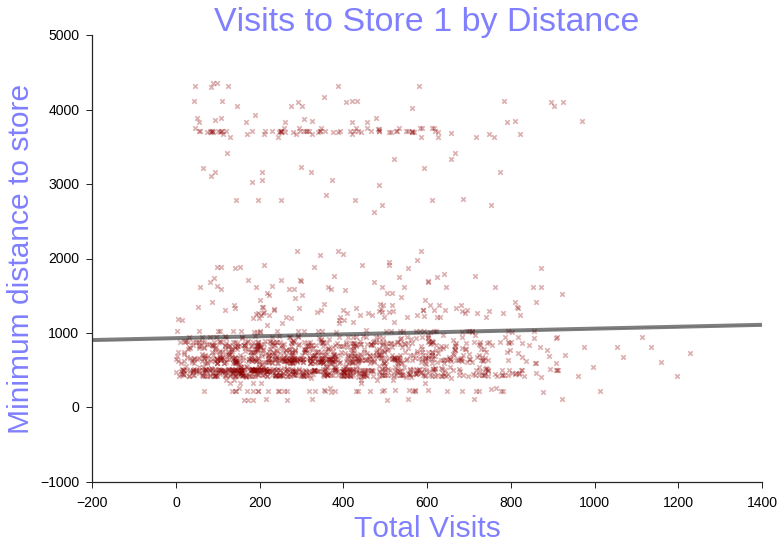

In [60]:
# We dont Probably need the Gridlines. Do we? If yes comment this line


sns.set(style="ticks")

# Here we create a matplotlib axes object. The extra parameters we use 
# "ci" to remove confidence interval
# "marker" to have a x as marker. 
# "scatter_kws" to provide style info for the points.[s for size]
# "line_kws" to provide style info for the line.[lw for line width]

g = sns.regplot(x="total_visits_store_1", y="min_distance_to_shops", data=store_1_home, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":20},
    line_kws={"color":"k","alpha":0.5,"lw":4},marker="x")

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,8)
# Set the Title of the graph from here
g.axes.set_title('Visits to Store 1 by Distance', fontsize=34,color="b",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Total Visits",size = 30,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Minimum distance to store",size = 30,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")


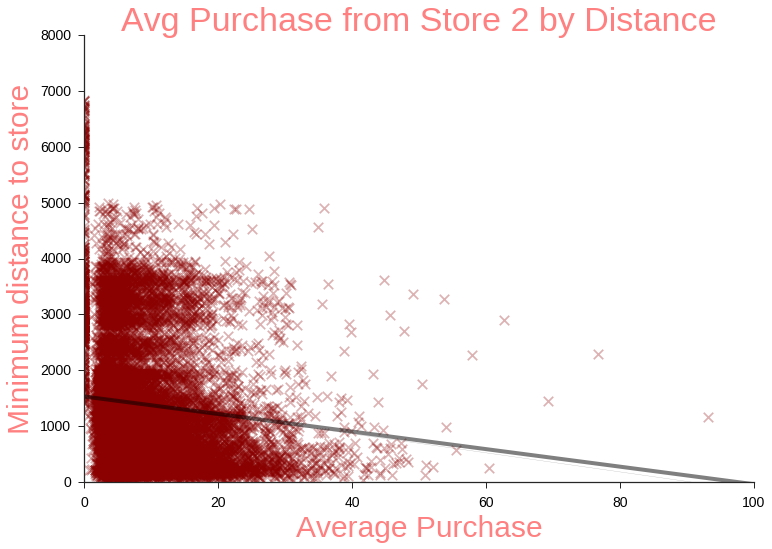

In [71]:
g = sns.regplot(x="avg_purchase_shop_2", y="min_distance_to_shops", data=store_2_home, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"k","alpha":0.5,"lw":4},marker="x")

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,8)
# Set the Title of the graph from here
g.axes.set_title('Avg Purchase from Store 2 by Distance', fontsize=34,color="r",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Average Purchase",size = 30,color="r",alpha=0.5)
g.set_xlim(0,100)
# Set the ylabel of the graph from here
g.set_ylabel("Minimum distance to store",size = 30,color="r",alpha=0.5)
g.set_ylim(0,8000)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

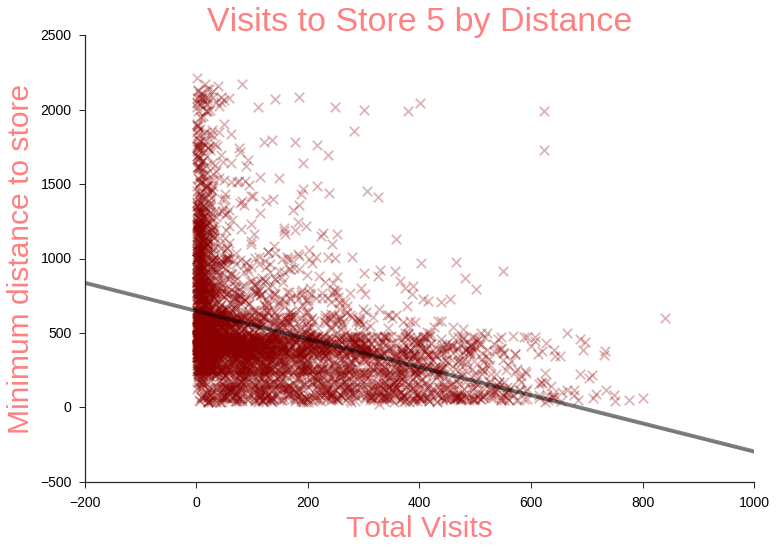

In [75]:
g = sns.regplot(x="total_visits_store_5", y="min_distance_to_shops", data=store_5_home, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"k","alpha":0.5,"lw":4},marker="x")

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,8)
# Set the Title of the graph from here
g.axes.set_title('Visits to Store 5 by Distance', fontsize=34,color="r",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Total Visits",size = 30,color="r",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Minimum distance to store",size = 30,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

From the store data we can see that store 1 is what I'll call a magnet store, with 55,552 total customers, of which 36,412 frequent store 1 the most out of the five stores.  However it's the closest store for only 1981 of it's custoemrs, less than 4%.  

Additionally it has the highest average price, so might be more upscale, or it might be a magnet for specific purchases as opposed to convenience items.

At the other end of the spectrum, stores 4 and 5 are what I'll call convenience stores.  They are home stores for fairly large customer groups, but are not the favorite stores for many of them, and their total customer numbers line up with their home customers numbers (they don't seem to be a magnet store, drawing customers from outside of their immediate vicinity)

## Histograms for products purchased in each visit

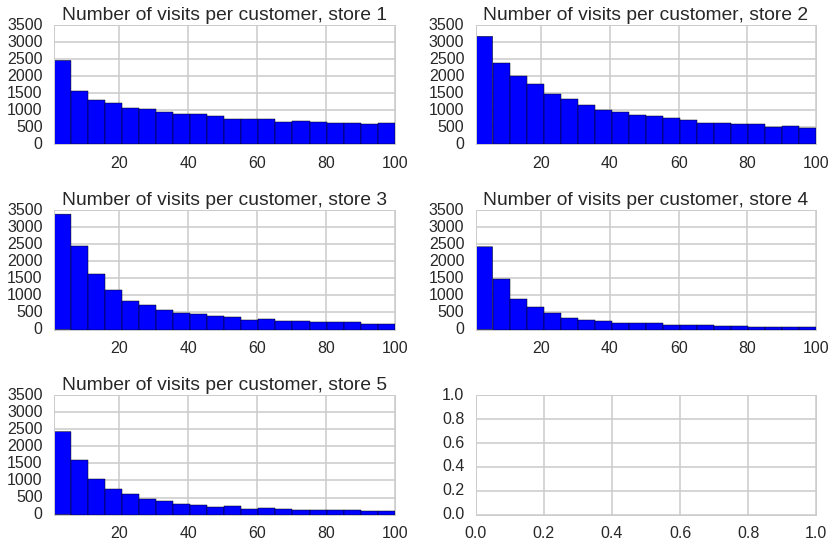

In [33]:
#Creating groups
cutoffs = [2,4,6,8,10]

store_1_customers = home.loc[home['shop_1_customer']==1]
store_2_customers = home.loc[home['shop_2_customer']==1]
store_3_customers = home.loc[home['shop_3_customer']==1]
store_4_customers = home.loc[home['shop_4_customer']==1]
store_5_customers = home.loc[home['shop_5_customer']==1]


n_bins = 20
rangeX = [1,100]
fig, axes = plt.subplots(nrows = 3, ncols = 2)
ax0,ax1,ax2,ax3,ax4,ax5 = axes.flat

ax0.hist(store_1_customers.total_visits_store_1,n_bins, facecolor = 'blue',range = rangeX)
ax0.set_title('Number of visits per customer, store 1')
ax0.set_xlim(1,100)
ax0.set_ylim(0,3500)

ax1.hist(store_2_customers.total_visits_store_2,n_bins,facecolor = 'blue',range = rangeX)
ax1.set_title('Number of visits per customer, store 2')
ax1.set_xlim(1,100)
ax1.set_ylim(0,3500)

ax2.hist(store_3_customers.total_visits_store_3,n_bins,facecolor = 'blue',range = rangeX)
ax2.set_title('Number of visits per customer, store 3')
ax2.set_xlim(1,100)
ax2.set_ylim(0,3500)

ax3.hist(store_4_customers.total_visits_store_4,n_bins,facecolor = 'blue',range = rangeX)
ax3.set_title('Number of visits per customer, store 4')
ax3.set_xlim(1,100)
ax3.set_ylim(0,3500)

ax4.hist(store_5_customers.total_visits_store_5,n_bins,facecolor = 'blue',range = rangeX)
ax4.set_title('Number of visits per customer, store 5')
ax4.set_xlim(1,100)
ax4.set_ylim(0,3500)


#plt.axis([40, 160, 0, 0.03])
plt.tight_layout()
plt.grid(True)
plt.show()

From the histograms, we can see that for all stores, the frequency with which customers visit the stores varies greatly.  For store 1 they have the smallest proportion of their sales for customers in the lowest bin (all customers plotted visit the store at least once).  Almost all the stores have the same number of infrequent customers (those in the first bin), but as we go out to the tail we see that stores 1 and 2 have a higher proportion of their customers in the tails.  For store 1, over 500 of their customers visit the store about 100 times, whereas for store 5 this number is closer to 20.  

This suggests that customer retention might be a major factor in store performance.  It appears to be the case that customers visit store 1 frequently, but visit a closer store if they need to grab something quickly.  

Next I'll look at the shopping habits of customers in their home stores

In [34]:
store_data['home_store_customers'] = 0
store_data.home_store_customers.loc[store_data.store == 1] = home[home.shop_1_customer == home.home_store_1]['favorite_store_1'].sum()
store_data.home_store_customers.loc[store_data.store == 2] = home[home.shop_2_customer == home.home_store_2]['favorite_store_2'].sum()
store_data.home_store_customers.loc[store_data.store == 3] = home[home.shop_3_customer == home.home_store_3]['favorite_store_3'].sum()
store_data.home_store_customers.loc[store_data.store == 4] = home[home.shop_4_customer == home.home_store_4]['favorite_store_4'].sum()
store_data.home_store_customers.loc[store_data.store == 5] = home[home.shop_5_customer == home.home_store_5]['favorite_store_5'].sum()
print store_data

   store  Total_customers  home_customers  favorite_customers  Total_sales_m  \
0      1            55552            1982               36412   1.394713e+08   
1      2            44794           18413               16600   8.290017e+07   
2      3            20503           15913                3556   1.830655e+07   
3      4            10400           12986                1942   6.659154e+06   
4      5            12423           11077                1918   8.338360e+06   

   Average_sales_m  Total_Customer_Visits  Total_sales_prod  avg_sales_prod  \
0        10.393319           1.341932e+07          53593740        3.993773   
1        10.846518           7.643021e+06          36543472        4.781286   
2         9.504150           1.926164e+06           9457859        4.910204   
3         9.535527           6.983520e+05           3419541        4.896587   
4         8.760033           9.518640e+05           4357361        4.577714   

   avg_price  home_store_customers  
0   2.6

Here we can see that for store 1, they have 1981 customers for whom store 1 is the closest store, and 1649 of those (about 83%) frequent store 1 most often.  At the other end of the spectrum, for store 5, only 1475 of their 12423 home customers (about 12%) frequent their store most often.  I would suggest that for stores 3, 4 and 5, they might want to target customers close by to increase loyalty, as a first approach.   

Next I'll look at customer loyalty, and see which customers comprise the majority of stores' revenues.

In [35]:
store_1_favorite = home.loc[home['favorite_store_1']==1]
store_2_favorite = home.loc[home['favorite_store_2']==1]
store_3_favorite = home.loc[home['favorite_store_3']==1]
store_4_favorite = home.loc[home['favorite_store_4']==1]
store_5_favorite = home.loc[home['favorite_store_5']==1]
store_data['total_sales_favorites']=0
store_data['total_sales_home_and_favorites']=0
store_data['total_sales_home']=0



store_data.total_sales_favorites.loc[store_data.store == 1] = store_1_favorite.amount_purchased_shop_1.sum()
store_data.total_sales_favorites.loc[store_data.store == 2] = store_2_favorite.amount_purchased_shop_2.sum()
store_data.total_sales_favorites.loc[store_data.store == 3] = store_3_favorite.amount_purchased_shop_3.sum()
store_data.total_sales_favorites.loc[store_data.store == 4] = store_4_favorite.amount_purchased_shop_4.sum()
store_data.total_sales_favorites.loc[store_data.store == 5] = store_5_favorite.amount_purchased_shop_5.sum()

store_data.total_sales_home_and_favorites.loc[store_data.store == 1] = (home.amount_purchased_shop_1*np.where(home.home_store_1==1,1,0)*np.where(home.favorite_store_1==1,1,0)).sum()
store_data.total_sales_home_and_favorites.loc[store_data.store == 2] = (home.amount_purchased_shop_2*np.where(home.home_store_2==1,1,0)*np.where(home.favorite_store_2==1,1,0)).sum()
store_data.total_sales_home_and_favorites.loc[store_data.store == 3] = (home.amount_purchased_shop_3*np.where(home.home_store_3==1,1,0)*np.where(home.favorite_store_3==1,1,0)).sum()
store_data.total_sales_home_and_favorites.loc[store_data.store == 4] = (home.amount_purchased_shop_4*np.where(home.home_store_4==1,1,0)*np.where(home.favorite_store_4==1,1,0)).sum()
store_data.total_sales_home_and_favorites.loc[store_data.store == 5] = (home.amount_purchased_shop_5*np.where(home.home_store_5==1,1,0)*np.where(home.favorite_store_5==1,1,0)).sum()

store_data.total_sales_home.loc[store_data.store == 1] = (home.amount_purchased_shop_1*np.where(home.home_store_1==1,1,0)).sum()
store_data.total_sales_home.loc[store_data.store == 2] = (home.amount_purchased_shop_2*np.where(home.home_store_2==1,1,0)).sum()
store_data.total_sales_home.loc[store_data.store == 3] = (home.amount_purchased_shop_3*np.where(home.home_store_3==1,1,0)).sum()
store_data.total_sales_home.loc[store_data.store == 4] = (home.amount_purchased_shop_4*np.where(home.home_store_4==1,1,0)).sum()
store_data.total_sales_home.loc[store_data.store == 5] = (home.amount_purchased_shop_5*np.where(home.home_store_5==1,1,0)).sum()

print store_data[['store','Total_sales_m','total_sales_favorites','total_sales_home','total_sales_home_and_favorites']]

   store  Total_sales_m  total_sales_favorites  total_sales_home  \
0      1   1.394713e+08           1.228605e+08      7.140207e+06   
1      2   8.290017e+07           6.422100e+07      5.528460e+07   
2      3   1.830655e+07           1.234078e+07      1.342092e+07   
3      4   6.659154e+06           5.034104e+06      5.654860e+06   
4      5   8.338360e+06           5.778185e+06      6.462425e+06   

   total_sales_home_and_favorites  
0                    6.971008e+06  
1                    4.669145e+07  
2                    9.884287e+06  
3                    4.494548e+06  
4                    4.918948e+06  


The interesting thing to note about the favorites vs. home data, is that at the top, the vast majority for store 1's sales accrue to customers who visit store 1 the most frequently.  At the other end of the spectrum, for stores 3, 4 and 5, most of their sales come from customers who are close by, but who might not be favorites (1.5m nearby customers are not 'favorites').  Thus stores might want to encourage loyalty from nearby existing customers.  

The final question I'm going to look at is the number of unique products bought across the different stores and customer groups.  This might suggest that the stores need to diversify their offerings to sell more products to the customers, or they need to focus more on the segment of the market that they are currently serving (depending on the margin on their products, and whether they are in direct competition with the other stores, or if they are trying to segment the market.

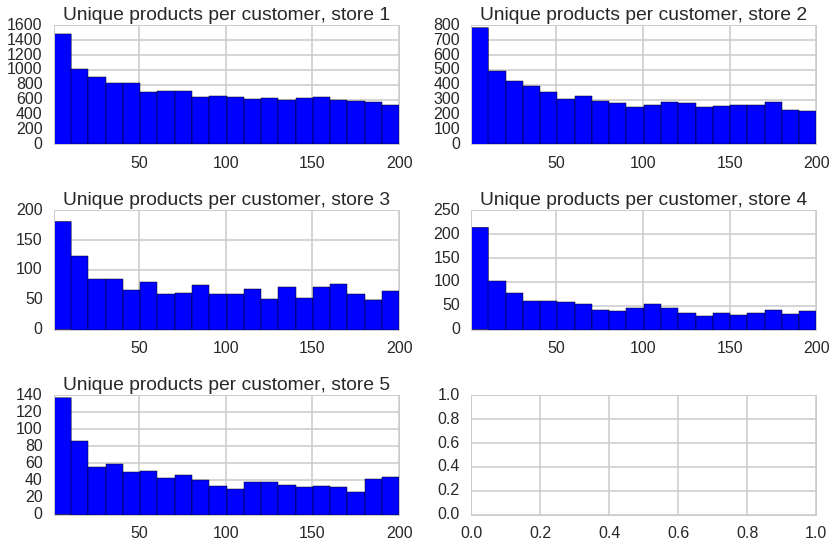

In [36]:
n_bins = 20
rangeX = [1,200]
fig, axes = plt.subplots(nrows = 3, ncols = 2)
ax0,ax1,ax2,ax3,ax4,ax5 = axes.flat

ax0.hist(store_1_favorite.unique_products_purchased_shop_1,n_bins, facecolor = 'blue',range = rangeX)
ax0.set_title('Unique products per customer, store 1')
ax0.set_xlim(rangeX)

ax1.hist(store_2_favorite.unique_products_purchased_shop_2,n_bins,facecolor = 'blue',range = rangeX)
ax1.set_title('Unique products per customer, store 2')
ax1.set_xlim(rangeX)

ax2.hist(store_3_favorite.unique_products_purchased_shop_3,n_bins,facecolor = 'blue',range = rangeX)
ax2.set_title('Unique products per customer, store 3')
ax2.set_xlim(rangeX)

ax3.hist(store_4_favorite.unique_products_purchased_shop_4,n_bins,facecolor = 'blue',range = rangeX)
ax3.set_title('Unique products per customer, store 4')
ax3.set_xlim(rangeX)

ax4.hist(store_5_favorite.unique_products_purchased_shop_5,n_bins,facecolor = 'blue',range = rangeX)
ax4.set_title('Unique products per customer, store 5')
ax4.set_xlim(rangeX)


#plt.axis([40, 160, 0, 0.03])
plt.tight_layout()
plt.grid(True)
plt.show()

Looking at the number of products bought by 'favorites', customers for whom the store is the one they visit the most frequently, we can see that the distributions all look very similar.  The scales vary widely, but the proportions of customers in each bin are fairly consistent across stores.  Surprisingly the distribution is fairly constant across the 50-200 products range.  Also surprising, many of these customers are binned at low levels of unique customers.  This could either suggest that some customers don't visit any of these five stores frequently, or they pop into these specific stores frequently for the same 3-5 items.  If I had more time I would look further into these issues. 